# End-to-end Multi-class Dog Classification

## Get our Workspace ready

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

# Getting our data ready (Turning into Tensors)

In [0]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     b43adc80f87f77949a64118df86bbeff  scottish_deerhound
freq                                   1                 126


In [0]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

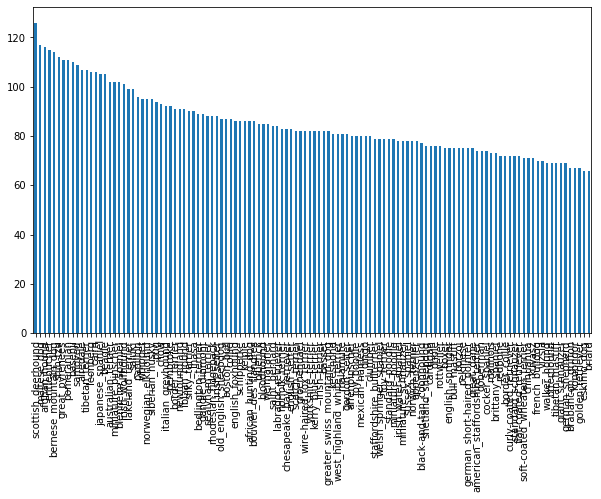

In [0]:
# How many images are there of ech breed
labels_csv["breed"].value_counts().plot.bar(figsize = (10,6));

In [0]:
# Let's view an image
# from IPython.display import Image
# Image("drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [0]:
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
# Check whether the filename matches the aactual images 
import os
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!!")
else:
  print("Do not match, please check the target directory")

Filenames match actual amount of files!!!


In [0]:
# Since we've got our training image filepaths in a list, let's prepare our labels
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:
if len(labels) == len(filenames):
  print("Yessss")
else:
  print("Oooyeee")

Yessss


In [0]:
# Find out unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [0]:
len(unique_breeds)

120

In [0]:
# Turn a single label into an array of boolens
print(labels[0])
labels[0] == unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
# Turn every breed into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
# Example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [0]:
# Setup number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type : "slider", min : 1000, max : 10000, step : 1000}

In [0]:
# Let's split the data into train and validation splits
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size of NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state = 42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [0]:
# Preprocesing the images (Turning an image into tensors)

# Convert an image into a numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [0]:
image.max()

255

In [0]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [0]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [0]:
# Now let's preprocess the image using functions

# Define image size
IMG_SIZE = 224

# Create a funtion for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image



In [0]:
# Turning our data into batches

# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associted label, processesthe image amd returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [0]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Define a function to turn all of our data into batches of size 32
def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  # If the data is test dataset, we probably don't have labels
  if test_data:
    print("Creating test batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor is faster than shuffling images
    data = data.shuffle(buffer_size = len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessor image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [0]:
# Creating the training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [0]:
# Checkout the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
# Visualizing data batches

import matplotlib.pyplot as plt
def show_25_images(images, labels):
  # Setup the figure
  plt.figure(figsize = (10, 10))
  # Loop through 25 (for displaying images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display and image
    plt.imshow(image[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [0]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.64486307, 0.6252552 , 0.60473704],
          [0.9176161 , 0.9013346 , 0.8611735 ],
          [0.9237746 , 0.91137964, 0.8440827 ],
          ...,
          [0.9431615 , 0.99624026, 0.99817723],
          [0.9686275 , 0.9876401 , 0.9994047 ],
          [0.9632003 , 0.97888654, 0.99065125]],
 
         [[0.636795  , 0.61718714, 0.59666896],
          [0.92256105, 0.9062795 , 0.86611843],
          [0.92617697, 0.913782  , 0.8464851 ],
          ...,
          [0.96341676, 0.9874062 , 0.9901835 ],
          [0.9710554 , 0.9876401 , 0.9994047 ],
          [0.9632003 , 0.97888654, 0.99065125]],
 
         [[0.6339549 , 0.61434704, 0.59382886],
          [0.92443746, 0.9081559 , 0.86799484],
          [0.9270659 , 0.91467094, 0.847374  ],
          ...,
          [0.9877101 , 0.97477245, 0.978694  ],
          [0.9793266 , 0.9843138 , 0.9979643 ],
          [0.9632003 , 0.97888654, 0.99065125]],
 
         ...,
 
         [[0.9450981 , 0.92549026, 0.85098046],
          [0.94901

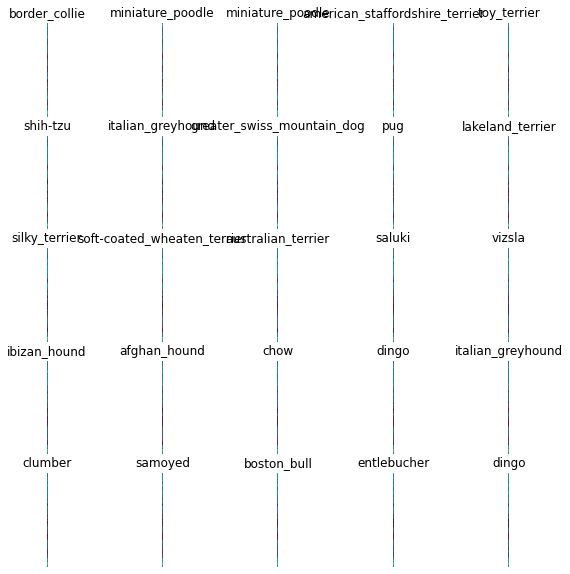

In [0]:
# Let's visualize the data in training batch
show_25_images(train_images, train_labels)

## Building a Model

In [0]:
# Input shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Output shape
OUTPUT_SHAPE = len(unique_breeds)

# Setup model url from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
# Create a function which builds Keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Buillding model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1
    tf.keras.layers.Dense(units = OUTPUT_SHAPE, activation = "softmax") # Layer 2
  ])

  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [0]:
model = create_model()
model.summary()

Buillding model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [0]:
# Creating callbacks
# 1. TensorBoard Callback
# Loading TensorBoard notebook extension
%load_ext tensorboard 

In [0]:
import datetime

# Create a function to build TensorBoard callback
def create_tensor_board_callaback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs", 
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

In [0]:
# Training a model
NUM_EPOCHS = 100 #@param {type: "slider", min: 10, max: 100, step: 10}

In [0]:
# Build a function to train and return a trained model
def train_model():
  # Create a model
  model = create_model()

  # Create a new tensorboard sesion everytime we train a model
  tensorboard = create_tensor_board_callaback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  return model

In [0]:
# Fit the model to the data
model = train_model()

Buillding model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 228s 9s/step - loss: 4.6744 - accuracy: 0.0825 - val_loss: 3.4135 - val_accuracy: 0.2550
Epoch 2/100
25/25 [==============================] - 6s 245ms/step - loss: 1.6616 - accuracy: 0.6812 - val_loss: 2.1051 - val_accuracy: 0.5300
Epoch 3/100
25/25 [==============================] - 7s 263ms/step - loss: 0.5730 - accuracy: 0.9388 - val_loss: 1.6149 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 6s 245ms/step - loss: 0.2542 - accuracy: 0.9875 - val_loss: 1.4533 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 6s 242ms/step - loss: 0.1488 - accuracy: 0.9962 - val_loss: 1.3648 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 6s 243ms/step - loss: 0.1008 - accuracy: 1.0000 - val_loss: 1.3178 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================

In [0]:
# Checking the TensorBoard logs
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

In [0]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose = 1)
predictions

7/7 [==============================] - 1s 148ms/step


array([[2.54692556e-03, 1.40422053e-04, 1.16478663e-03, ...,
        6.49414607e-04, 7.25038626e-05, 2.06607440e-03],
       [7.46039255e-03, 1.70535641e-03, 1.51405409e-02, ...,
        7.80729868e-04, 4.58721537e-03, 3.08230985e-04],
       [1.95925968e-05, 6.78874057e-05, 5.72011741e-05, ...,
        1.52652879e-04, 8.99247898e-05, 9.97263778e-05],
       ...,
       [8.60683849e-06, 4.61075455e-04, 6.89731096e-05, ...,
        3.51031922e-05, 4.34003887e-05, 5.46806950e-06],
       [7.94034824e-03, 2.06447774e-04, 1.85968573e-04, ...,
        4.03067854e-04, 2.19678928e-04, 5.93596837e-03],
       [1.31311605e-03, 4.36211179e-04, 1.32925424e-03, ...,
        3.06885852e-03, 1.95889524e-03, 1.19755656e-04]], dtype=float32)

In [0]:
np.sum(predictions[0])

0.99999994

In [0]:
# First Prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[2.10158702e-04 5.36468906e-05 1.69088762e-05 8.39468703e-05
 3.10733565e-03 7.50889812e-05 1.34047616e-04 1.36514299e-03
 3.69644798e-02 3.55165415e-02 1.44889918e-05 1.34116972e-05
 2.28322437e-03 5.61243156e-03 1.73076789e-03 1.01369796e-02
 1.15378418e-04 7.25792255e-04 1.73970504e-04 3.04628949e-04
 6.49463691e-05 4.11686837e-04 4.65296398e-05 3.86149113e-05
 7.54214497e-03 2.37871674e-04 7.10970271e-05 1.06011263e-04
 3.23508750e-03 7.41307740e-05 1.60914045e-04 2.64252478e-04
 1.90285456e-04 1.99218615e-04 5.03180236e-05 1.10293431e-05
 4.34427551e-04 4.47705097e-04 1.60889576e-05 1.84930503e-01
 3.39215359e-04 3.26239933e-05 5.00941835e-03 7.85418342e-06
 3.57073237e-04 2.46926247e-05 2.38346154e-04 2.05540331e-04
 7.98611727e-05 7.29808176e-04 1.44336125e-04 1.82576681e-04
 2.83052388e-04 4.68774093e-03 1.03972714e-04 1.20536995e-03
 5.30992053e-04 2.42035167e-04 2.01355215e-04 3.71961396e-05
 2.61360226e-04 9.85723687e-04 1.92676816e-05 5.59748223e-05
 2.83821952e-04 2.868974

In [0]:
# Turn pred.prob. into their respective labels
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on pred.prob
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

In [0]:
# Create a function to unbatch the batched data
images_ = []
labels_ = []

# Loop through the unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
# Create a function to unbatchify
def unbatchify(data):
  images = []
  labels = []

  # Loop through the unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
# Visualize the predictions
def plot_pred(prediction_probabilities, labels, images, n = 1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the label depending on the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change the plot title
  plt.title("{} {:2.0f}% {}".format(pred_label, 
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color = color)

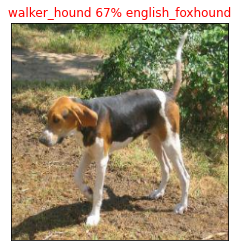

In [0]:
plot_pred(prediction_probabilities = predictions, labels = val_labels, images = val_images, n = 42)

In [0]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup a plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  # Change the color of the label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

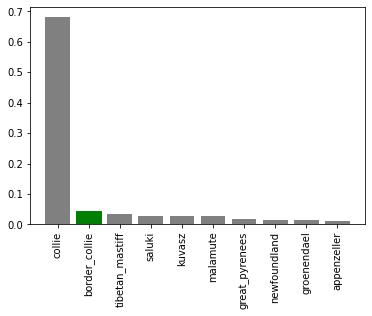

In [0]:
plot_pred_conf(prediction_probabilities = predictions, labels = val_labels, n = 9)

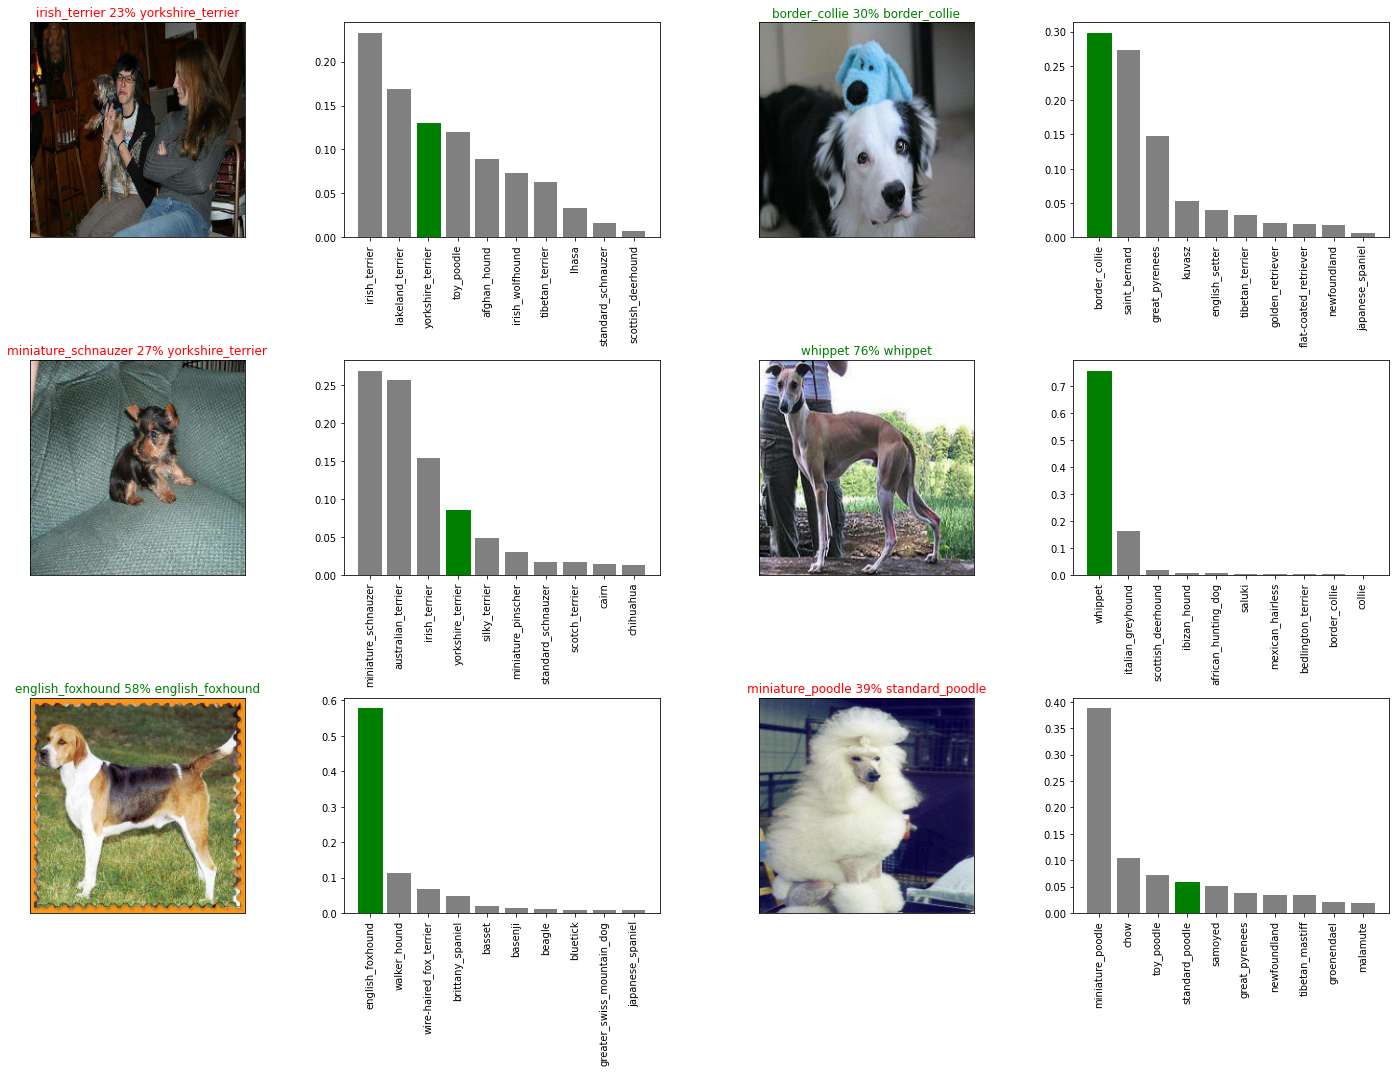

In [0]:
# Let's check few preds and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize = (10 * num_cols, 5 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_pred(prediction_probabilities = predictions,
            labels = val_labels,
            images = val_images,
            n = i + i_multiplier)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_pred_conf(prediction_probabilities = predictions,
                 labels = val_labels,
                 n = i + i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

In [0]:
# Create a function to save a model
def save_model(model, suffix = None):
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "_" + suffix + ".h5" # save model format
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [0]:
# Create a function to load trained model
def load_model(model_path):
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects = {"KerasLayer": hub.KerasLayer})
  return model

In [0]:
# Save our trained model on 1000 images
save_model(model, suffix = "1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20200503-134741_1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200503-134741_1000-images-mobilenetv2-Adam.h5'

In [0]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20200503-134741_1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200503-134741_1000-images-mobilenetv2-Adam.h5


In [0]:
# Evaluate pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 155ms/step - loss: 1.2440 - accuracy: 0.6700


[1.2440004348754883, 0.6700000166893005]

In [0]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 159ms/step - loss: 1.2440 - accuracy: 0.6700


[1.2440004348754883, 0.6700000166893005]

In [0]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# Create a model for full model
full_model = create_model()

Buillding model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create full model callbacks
full_model_tensorboard = create_tensor_board_callaback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             patience = 3)

In [0]:
# Fit the model to the full data
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 2496s 8s/step - loss: 1.3349 - accuracy: 0.6673
Epoch 2/100
320/320 [==============================] - 67s 209ms/step - loss: 0.3969 - accuracy: 0.8848
Epoch 3/100
320/320 [==============================] - 66s 207ms/step - loss: 0.2373 - accuracy: 0.9350
Epoch 4/100
320/320 [==============================] - 68s 211ms/step - loss: 0.1523 - accuracy: 0.9653
Epoch 5/100
320/320 [==============================] - 67s 208ms/step - loss: 0.1054 - accuracy: 0.9780
Epoch 6/100
320/320 [==============================] - 67s 209ms/step - loss: 0.0762 - accuracy: 0.9878
Epoch 7/100
320/320 [==============================] - 65s 203ms/step - loss: 0.0584 - accuracy: 0.9916
Epoch 8/100
320/320 [==============================] - 65s 204ms/step - loss: 0.0464 - accuracy: 0.9936
Epoch 9/100
320/320 [==============================] - 66s 205ms/step - loss: 0.0372 - accuracy: 0.9959
Epoch 10/100
320/320 [==============================] - 67s 210ms

In [0]:
save_model(full_model, suffix = "full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog Vision/models/20200503-151544_full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Dog Vision/models/20200503-151544_full-image-set-mobilenetv2-Adam.h5'

In [0]:
loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20200503-151544_full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200503-151544_full-image-set-mobilenetv2-Adam.h5


In [0]:
# Load test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/e288dace85bb7ae95b545066bcbdee60.jpg',
 'drive/My Drive/Dog Vision/test/dce52d7235885d9ad2ae34006e2ecb1e.jpg',
 'drive/My Drive/Dog Vision/test/e6926a5046cd957245918c33985bcd62.jpg',
 'drive/My Drive/Dog Vision/test/e2537e98808877c707bfe8ca53e303b7.jpg',
 'drive/My Drive/Dog Vision/test/e55d2fced9eb7e46aef5bdb288145fa4.jpg',
 'drive/My Drive/Dog Vision/test/e6920cc0fd2e3099506d23761d9682e1.jpg',
 'drive/My Drive/Dog Vision/test/e53cb5b42ea1a7700cd294a336890361.jpg',
 'drive/My Drive/Dog Vision/test/e334f758c7944df19c98d49498d28c64.jpg',
 'drive/My Drive/Dog Vision/test/e2686707ac5b5f75ce2ccbc906b624d8.jpg',
 'drive/My Drive/Dog Vision/test/e05367db91d0449b2afe76a1b7acc1c8.jpg']

In [0]:
# Create a data batch
test_data = create_data_batches(test_filenames, test_data = True)

Creating test batches...


In [0]:
# Make predictions on the test data batch using the loaded full method
test_predictions = loaded_full_model.predict(test_data, verbose = 1)

324/324 [==============================] - 2707s 8s/step


In [0]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter = ",")

In [0]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter = ",")

In [0]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns = ["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [0]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df.head()

id  ... yorkshire_terrier
0  e288dace85bb7ae95b545066bcbdee60  ...               NaN
1  dce52d7235885d9ad2ae34006e2ecb1e  ...               NaN
2  e6926a5046cd957245918c33985bcd62  ...               NaN
3  e2537e98808877c707bfe8ca53e303b7  ...               NaN
4  e55d2fced9eb7e46aef5bdb288145fa4  ...               NaN

[5 rows x 121 columns]

In [0]:
# Add the prediction probabilities to each dog breed columm
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  e288dace85bb7ae95b545066bcbdee60  ...       4.16796e-08
1  dce52d7235885d9ad2ae34006e2ecb1e  ...       1.15679e-07
2  e6926a5046cd957245918c33985bcd62  ...       1.00009e-06
3  e2537e98808877c707bfe8ca53e303b7  ...       4.54614e-13
4  e55d2fced9eb7e46aef5bdb288145fa4  ...       1.14201e-08

[5 rows x 121 columns]

In [0]:
# Export it to a CSV
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetv2.csv", index = False)